In [1]:
library (tidyverse)
options(repr.matrix.max.rows=6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,4c0662a559f9d83b4d84ce3d86e6577c9f7a426c80465c6174321afd96664da5,0,Selena,Male,46
Regular,FALSE,7b17513f11968feaf6b02977885c436dc2a4549489ca25ef03022f9fbae19d81,0,Balthazar,Male,50
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0,Dylan,Prefer not to say,57


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
⋮,⋮
e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,47
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41
a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,37


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22
Amateur,TRUE,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,17.2,Kyrie,Male,14
Beginner,FALSE,e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,7.1,Arash,Male,17


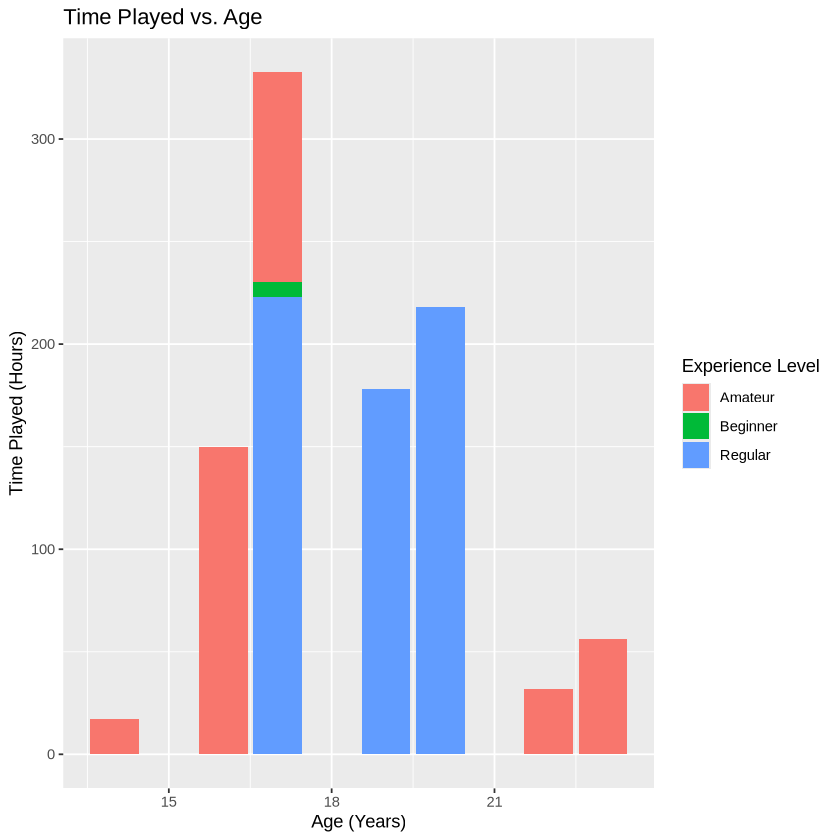

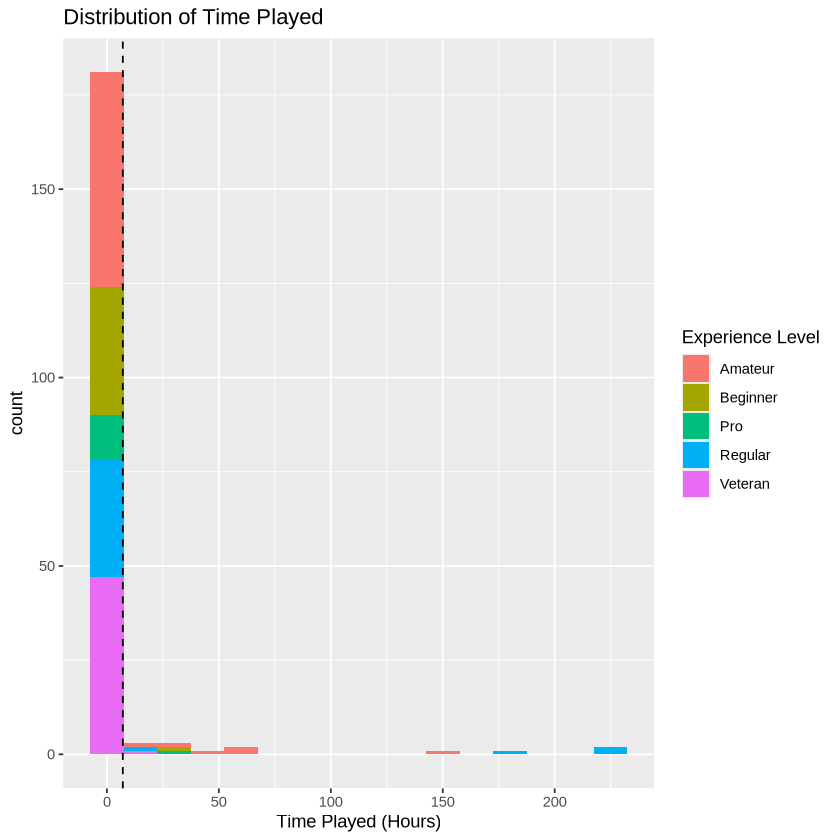

In [2]:
#reading players data
players_data <- read_csv("https://raw.githubusercontent.com/cynthiawei12-hub/DSCI100Individual/refs/heads/main/data/players.csv")

#wrangle players data
players_data_wrangle <- players_data |>
                        drop_na (experience,subscribe, hashedEmail, played_hours, name, gender, Age) |>
                        arrange (-played_hours, Age) |>
                        mutate (
                                experience =as.factor (experience),
                                gender = as.factor (gender),
                                Age = as.numeric (Age))
players_data_wrangle

#mean player's data
mean_players_data <- players_data_wrangle |>
                        select (played_hours, Age) |>
                        map_df (mean, na.rm=TRUE) 

#reading sessions data
sessions_data <- read_csv("https://raw.githubusercontent.com/cynthiawei12-hub/DSCI100Individual/refs/heads/main/data/sessions.csv")
sessions_data 

#Players that contribute the most data 
session_data_wrangle <- sessions_data |>
                        group_by (hashedEmail) |>
                        summarize (count=n()) |>
                        slice_max(order_by=count, n=10)
session_data_wrangle 

#Top Players Data
top_players <- players_data_wrangle |>
                semi_join (session_data_wrangle,by="hashedEmail")
top_players

#Top Players Visualization
top_players_bar <- top_players |>
                    ggplot (aes (x=Age, y=played_hours, fill=experience)) +
                    geom_bar (stat="identity") +
                    labs (x="Age (Years)", 
                          y="Time Played (Hours)", 
                          fill="Experience Level", 
                          title = "Time Played vs. Age")
                                  
top_players_bar

#Overall Distribution of Played Hours
players_hist <- players_data_wrangle |>
                ggplot (aes (x=played_hours, fill=experience)) +
                geom_histogram (binwidth = 15) +
                labs (x="Time Played (Hours)", title="Distribution of Time Played", fill="Experience Level") +
                geom_vline(xintercept=7.1, linetype="dashed")
players_hist

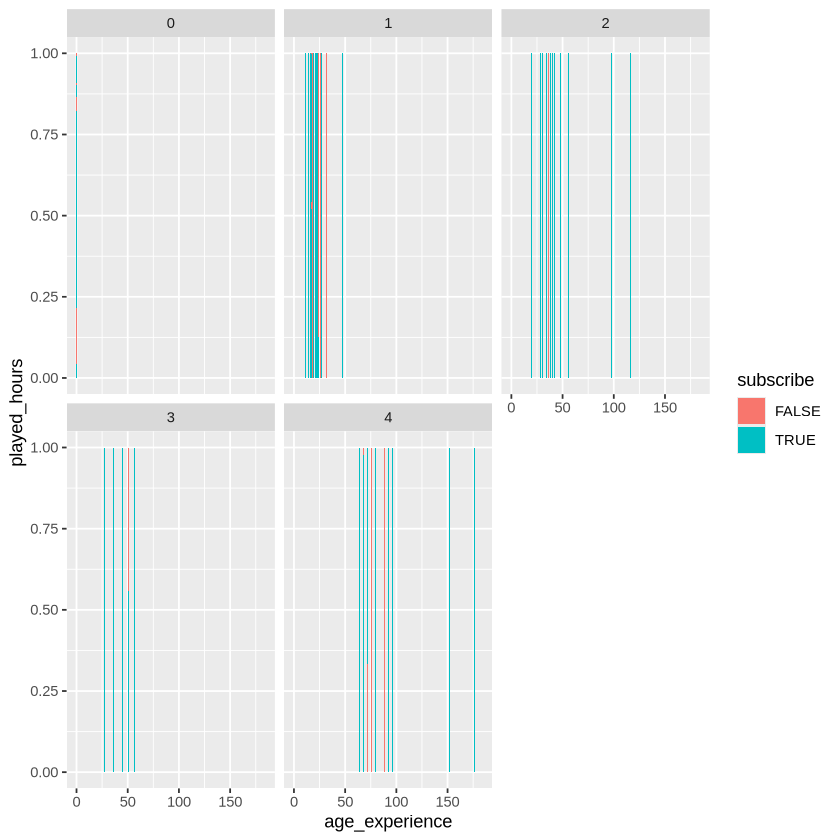

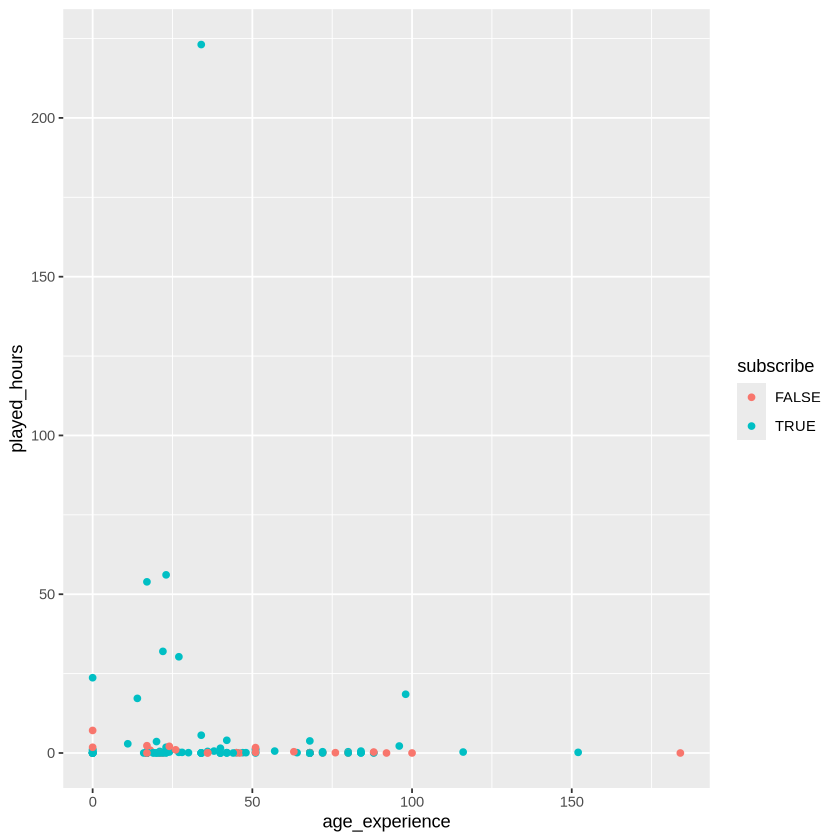

In [12]:
#player's proportions by experience
player_proportions_data <- players_data |>
                        mutate(experience =recode(experience, "Amateur"=1, "Regular"=2, "Pro"=3, "Veteran"=4, .default=0)) |>
                        filter (gender=="Male" |gender=="Female") |>
                        mutate(age_experience=Age*experience)

player_proportions_viz <-player_proportions_data |>
                        ggplot (aes (x=age_experience, y=played_hours, fill=subscribe, group=gender)) +
                        geom_bar (stat="identity",position="fill", na.rm=TRUE) +
                        facet_wrap(~experience)
player_proportions_viz

#Regular Players graph
regular_graph <- player_proportions_data |>
                    filter(gender=="Male") |>
                    ggplot (aes (x=age_experience, y=played_hours, colour=subscribe)) +
                    geom_point ()
regular_graph 


#- try grouping by experience level 